In [75]:
import os
import numpy as np
try: os.sys.path.insert(0, os.environ['FOGGIE_REPO']) # exception catching added by Ayan on July 14, 2021
except: pass
import yt
import datashader as dshader, pandas as pd
import datashader.transfer_functions as tf
import matplotlib as mpl

from foggie.utils.consistency import new_phase_color_key, new_metals_color_key, categorize_by_temp, categorize_by_metals

In [76]:
def create_foggie_cmap():
    """This function creates colormaps for FOGGIE shade maps for 'phase', 'metal', and 'cell_mass' colorcodes."""
    x = np.random.rand(100000)
    y = np.random.rand(100000)
    temp = np.random.rand(100000) * 3.2 + 3.8 # log values of temperature range from 3.8 to 7 
    metallicity = np.random.rand(100000) * 4. - 3.
    
    df = pd.DataFrame({})
    df['x'] = x
    df['y'] = y
    df['temperature'] = temp
    df['metallicity'] = metallicity

    df['phase'] = categorize_by_temp(df['temperature'])
    df.phase = df.phase.astype('category')

    df['metal'] = categorize_by_metals(df['metallicity'])
    df.metal = df.metal.astype('category')

    cell_mass = np.random.rand(100000) * 8. - 2.
    df['cell_mass'] = cell_mass
    df['cell_mass'] = df['cell_mass'].astype('float')

    print(df) 

    phase_img = grab_cmap(df, 'temperature', 'y', 'phase', new_phase_color_key)
    metal_img = grab_cmap(df, 'metallicity', 'y', 'metal', new_metals_color_key)
    cell_mass_img = grab_cmap(df, 'cell_mass', 'y', 'cell_mass', new_metals_color_key)

    return phase_img, metal_img, cell_mass_img

In [77]:
def grab_cmap(df, axis_to_use, second_axis, labels_to_use, color_key):
    """
    takes in a dataframe and some other info and returns the colormap image
    JT 090618
    """

    cvs = dshader.Canvas(plot_width=750, plot_height=100,
                         x_range=(np.min(df[axis_to_use]),
                                  np.max(df[axis_to_use])),
                         y_range=(np.min(df[second_axis]),
                                  np.max(df[second_axis])))
    if (labels_to_use == 'cell_mass'):
        agg = cvs.points(df, axis_to_use, second_axis, dshader.mean(labels_to_use))
        cmap = tf.spread(tf.shade(agg, cmap=mpl.cm.get_cmap('icefire'), how='eq_hist',min_alpha=40), shape='square', px=2) 
    else: 
        agg = cvs.points(df, axis_to_use, second_axis, dshader.count_cat(labels_to_use))
        cmap = tf.spread(tf.shade(agg, color_key=color_key), px=2, shape='square')

    return cmap

In [78]:
phase, metal, cell_mass = create_foggie_cmap() 

              x         y  temperature  metallicity     phase     metal  \
0      0.562278  0.669030     4.892960    -0.339185  b'cool2'   b'free'   
1      0.471485  0.674070     6.087863    -2.013566    b'hot'   b'free'   
2      0.165324  0.173398     3.903763    -1.764913  b'cold1'   b'free'   
3      0.809119  0.772221     4.684142    -0.122957  b'cool1'   b'free'   
4      0.945570  0.844359     4.275200     0.019385  b'cold3'  b'poor1'   
...         ...       ...          ...          ...       ...       ...   
99995  0.729952  0.851397     5.195591    -0.795404  b'cool3'   b'free'   
99996  0.023615  0.548638     4.424714    -0.230504   b'cool'   b'free'   
99997  0.463383  0.552167     4.628578    -2.407803  b'cool1'   b'free'   
99998  0.114163  0.551158     5.485208    -0.426330  b'warm1'   b'free'   
99999  0.480540  0.961308     4.977362    -0.891014  b'cool2'   b'free'   

       cell_mass  
0       4.558779  
1      -1.190876  
2       2.364621  
3       0.364196  
4   

/var/folders/8h/lvj2t2nn6kz64_khgd4wldg00003dn/T/ipykernel_29383/3773388561.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = tf.spread(tf.shade(agg, cmap=mpl.cm.get_cmap('icefire'), how='eq_hist',min_alpha=40), shape='square', px=2)


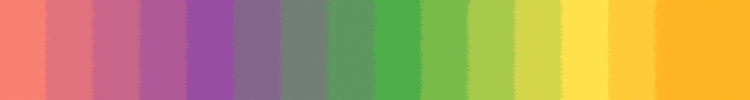

In [79]:
phase

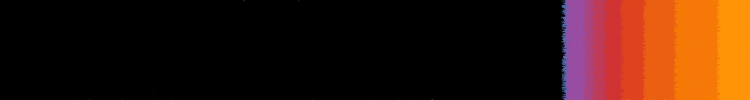

In [80]:
metal

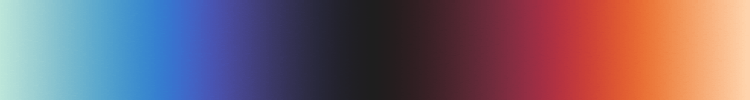

In [81]:
cell_mass

In [82]:
metal_min = 5.e-3
metal_max = 2.

def categorize_by_metals(metal):
    """ define the temp category strings"""
    metal_vals = np.power(10.0, np.linspace(start=np.log10(metal_min),
                                            stop=np.log10(metal_max), num=21))

    print(metal_vals) 
    # make the highest value really high
    metal_vals[20] = 50. * metal_vals[20]
    phase = np.chararray(np.size(metal), 6)
    phase[metal < metal_vals[20]] = b'high4'
    phase[metal < metal_vals[19]] = b'high3'
    phase[metal < metal_vals[18]] = b'high2'
    phase[metal < metal_vals[17]] = b'high1'
    phase[metal < metal_vals[16]] = b'high'
    phase[metal < metal_vals[15]] = b'solar3'
    phase[metal < metal_vals[14]] = b'solar2'
    phase[metal < metal_vals[13]] = b'solar1'
    phase[metal < metal_vals[12]] = b'solar'
    phase[metal < metal_vals[11]] = b'low3'
    phase[metal < metal_vals[10]] = b'low2'
    phase[metal < metal_vals[9]] = b'low1'
    phase[metal < metal_vals[8]] = b'low'
    phase[metal < metal_vals[7]] = b'poor3'
    phase[metal < metal_vals[6]] = b'poor2'
    phase[metal < metal_vals[5]] = b'poor1'
    phase[metal < metal_vals[4]] = b'poor'
    phase[metal < metal_vals[3]] = b'free3'
    phase[metal < metal_vals[2]] = b'free2'
    phase[metal < metal_vals[1]] = b'free1'
    phase[metal < metal_vals[0]] = b'free'
    return phase 

In [37]:
categorize_by_metals([0.02]) 

[0.005      0.00674641 0.00910282 0.01228228 0.01657227 0.02236068
 0.03017088 0.04070905 0.05492803 0.07411344 0.1        0.13492828
 0.18205642 0.24564561 0.3314454  0.4472136  0.60341763 0.81418106
 1.09856054 1.4822689  2.        ]


chararray([b'poor1'], dtype='|S6')

In [68]:
new_metals_color_key

OrderedDict([(b'free', '#000000'),
             (b'free1', '#132133'),
             (b'free2', '#29456a'),
             (b'free3', '#3e69a1'),
             (b'poor', '#566db1'),
             (b'poor1', '#6f61ab'),
             (b'poor2', '#8656a7'),
             (b'poor3', '#984ea3'),
             (b'low', '#984ea3'),
             (b'low1', '#984ea3'),
             (b'low2', '#994ea2'),
             (b'low3', '#ab457f'),
             (b'solar', '#be3c59'),
             (b'solar1', '#d13333'),
             (b'solar2', '#df431f'),
             (b'solar3', '#ec6013'),
             (b'high', '#f77a08'),
             (b'high1', '#ff9508'),
             (b'high2', '#ffb020'),
             (b'high3', '#ffca37'),
             (b'high4', '#ffe34d')])

In [69]:
metal_vals = np.power(10.0, np.linspace(start=np.log10(0.005),
                                            stop=np.log10(2.), num=21))

array([-2.30103 , -2.170927, -2.040824, -1.910721, -1.780618, -1.650515,
       -1.520412, -1.390309, -1.260206, -1.130103, -1.      , -0.869897,
       -0.739794, -0.609691, -0.479588, -0.349485, -0.219382, -0.089279,
        0.040824,  0.170927,  0.30103 ])

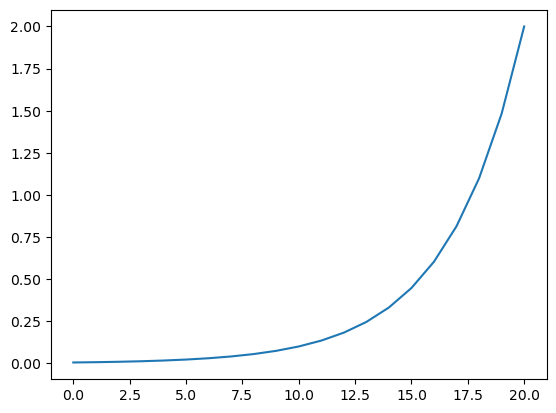

In [71]:
plt.plot(metal_vals) 